<a href="https://colab.research.google.com/github/JatinB22/DataScienceProjects/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
file_path = os.path.join(path, 'spam.csv')
df = pd.read_csv(file_path, encoding='latin-1')

In [5]:
df.shape

(5572, 5)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1. Data Cleaning
2. EDA

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample()

,v1,v2
4263,ham,She just broke down a list of reasons why nobo...


In [10]:
#rename the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample()

,target,text
5218,ham,I accidentally brought em home in the box


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

,0
target,0
text,0


In [15]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [38]:
#remove duplicates
df = df.drop_duplicates(keep='first')

## EDA

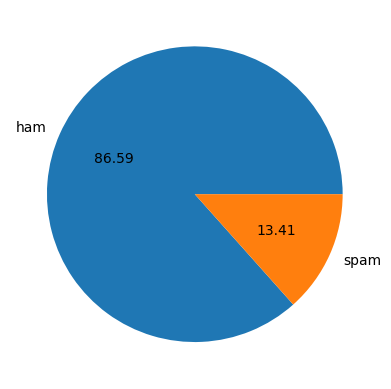

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

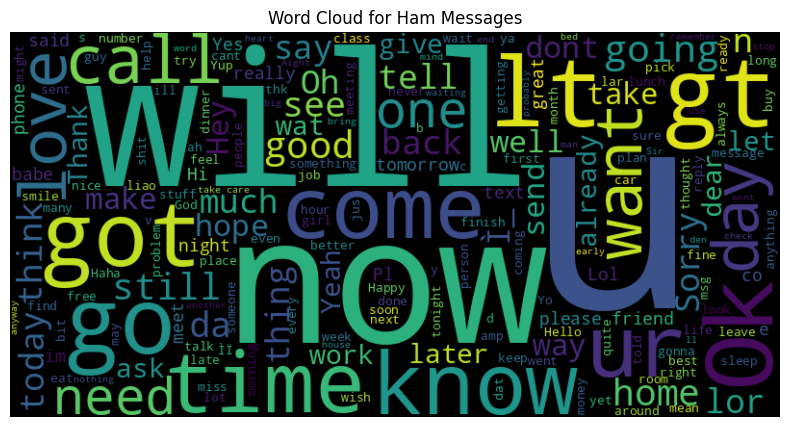

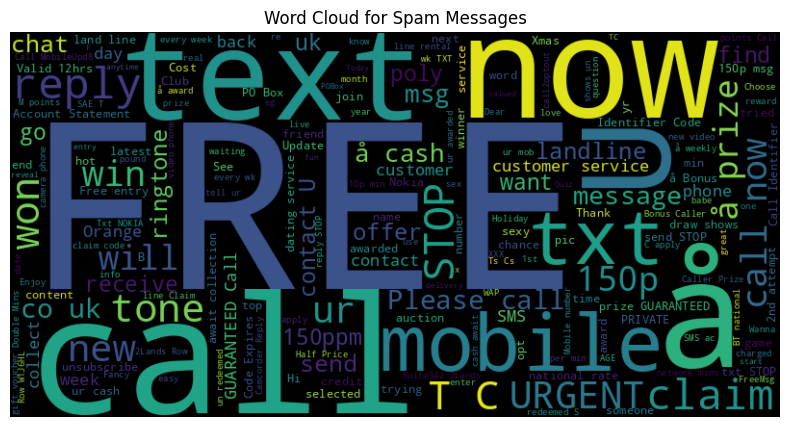

In [31]:
# Filter the DataFrame to create two separate DataFrames
ham_df = df[df['target'] == 0]
spam_df = df[df['target'] == 1]

# Concatenate all text from the 'ham' DataFrame into a single string
ham_text = " ".join(ham_df['text'].tolist())

# Concatenate all text from the 'spam' DataFrame into a single string
spam_text = " ".join(spam_df['text'].tolist())

# Import the WordCloud class
from wordcloud import WordCloud

# Create a WordCloud object for 'ham' messages
ham_wordcloud = WordCloud(width=800, height=400, random_state=2).generate(ham_text)

# Display the 'ham' word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Ham Messages")
plt.show()

# Create a WordCloud object for 'spam' messages
spam_wordcloud = WordCloud(width=800, height=400, random_state=2).generate(spam_text)

# Display the 'spam' word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Messages")
plt.show()

In [18]:
#Data is imbalance

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
df['num_char'] = df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#number of words
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[df['target'] == 0][['num_char', 'num_word', 'num_sentence']].describe()

,num_char,num_word,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target'] == 1][['num_char', 'num_word', 'num_sentence']].describe()

,num_char,num_word,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Model Training

In [42]:
# Apply text transformation
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Apply text transformation
df['transformed_text'] = df['text'].apply(transform_text)

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

## Model Evaluation

In [37]:
# Evaluate the model
y_pred = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision: 1.0


## Implement model comparison

### Subtask:
Train and evaluate multiple classification models.


In [41]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# import xgboost as xgb # Uncomment if xgboost is installed and needed

models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l1'),
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=9),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=50, random_state=2),
}

performance_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    performance_metrics[name] = {'accuracy': accuracy, 'precision': precision}
    print(f'{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}')


LogisticRegression: Accuracy=0.9555, Precision=0.9600
SVC: Accuracy=0.9758, Precision=0.9748
KNeighborsClassifier: Accuracy=0.8878, Precision=1.0000
DecisionTreeClassifier: Accuracy=0.9304, Precision=0.8300
RandomForestClassifier: Accuracy=0.9739, Precision=0.9826


## Select best model

### Subtask:
Compare the performance of the models and identify the best one based on chosen metrics.


In [35]:
best_model_name = None
best_precision = -1

for name, metrics in performance_metrics.items():
    if metrics['precision'] > best_precision:
        best_precision = metrics['precision']
        best_model_name = name

print(f"The best model based on precision is: {best_model_name}")
print(f"Accuracy: {performance_metrics[best_model_name]['accuracy']:.4f}")
print(f"Precision: {performance_metrics[best_model_name]['precision']:.4f}")

The best model based on precision is: KNeighborsClassifier
Accuracy: 0.8878
Precision: 1.0000


# SMS Spam Collection Classification

## Project Description
This project aims to build a classification model to distinguish between legitimate (ham) and spam SMS messages. The project involves data loading, cleaning, exploratory data analysis (EDA), text preprocessing, model training, and evaluation.

## Data Source
The dataset used in this project is the "SMS Spam Collection Dataset" from UCI Machine Learning Repository, downloaded via KaggleHub.

## Preprocessing Steps
1.  Load the dataset and drop irrelevant columns.
2.  Rename columns for clarity ('v1' to 'target', 'v2' to 'text').
3.  Encode the 'target' column (ham as 0, spam as 1).
4.  Check for and remove duplicate entries.
5.  Perform text transformation:
    *   Convert text to lowercase.
    *   Tokenize the text.
    *   Remove non-alphanumeric characters.
    *   Remove English stopwords and punctuation.
    *   Apply Porter Stemming to words.

## Model Used
A Multinomial Naive Bayes model is used for classification after transforming the text data using TF-IDF vectorization.

## Results
The model was evaluated based on accuracy, confusion matrix, and precision. The results indicate good performance in classifying spam messages.

## How to Run the Code
1.  Ensure you have a Python environment with the necessary libraries installed (see Dependencies).
2.  Download the notebook file.
3.  Run the cells in the notebook sequentially.

## Dependencies
*   pandas
*   numpy
*   matplotlib
*   seaborn
*   scikit-learn
*   nltk
*   kagglehub
*   wordcloud